<h1 style="text-align: left;"><strong><span style="text-decoration: underline;">Loading the libraries</span></strong></h1>
<p>it will load the basic libraries which are required for the working of the kernel. Make sure to use tensor flow with GPU if your graphics card is supported.</p>

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf

c:\users\mayan\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<h1 style="text-align: left;"><u>Load the data</u></h1>
<p>Load the test &amp; the train data downloaded from <a href="https://www.kaggle.com/c/digit-recognizer/data" target="_blank" rel="noopener">kaggle</a></p>

In [32]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [38]:
print ( "The shape of test data is " + str (test.shape))
test.head()


The shape of test data is (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:

print ( "The shape of train is "+   str(train.shape) )
train.head()


The shape of train is (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h1 style="text-align: left;"><u>Separate the image &amp; labels</u></h1>
Thus here we can see that out image has 42000 IMAGES with 784 pixels. The first column is for the label. After that pixel are numbered from 0 to 784.

In [40]:
labels = train["label"]

# Drop 'label' column
images = train.drop(labels = ["label"],axis = 1)

# free some space
del train 

<h1 style="text-align: left;"><u>Visualize the labels</u></h1>

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

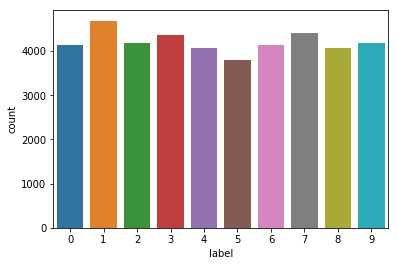

In [41]:
g = sns.countplot(labels)

labels.value_counts()

<h2 id="2.2-Check-for-null-and-missing-values">Check for null and missing values</h2>

In [42]:
# Check the data
images.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [43]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

<h2 id="2.2-Check-for-null-and-missing-values">NORMALIZATION&nbsp;</h2>

We perform a grayscale normalization to reduce the effect of illumination's differences.

Moreover the CNN converg faster on [0..1] data than on [0..255]

In [44]:
images = images / 255.0
test = test / 255.0

<h1 id="Viewing-an-Image">Viewing an Image</h1>
<p>Since the image is currently one-dimension, we load it into a numpy array and reshape it so that it is two-dimensional (28x28 pixels) Then, we plot the image and label with matplotlib</p>

Text(0.5,1,'0.0')

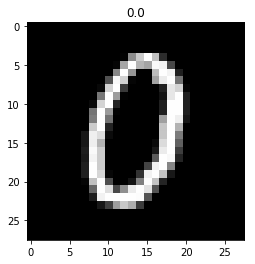

In [45]:
i=5
img=images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(images.iloc[i,0])

<h1> Loading the libraries for ML </h1>

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree

<h1> Splitting the data</h1>

In [48]:
X_train, X_test,Y_train, Y_test = train_test_split(images, labels, train_size=0.9, random_state=0)

c:\users\mayan\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


<h1> Model 1 - Logistic Regression </h1>

In [59]:
model = LogisticRegression()
# Train the model using the training sets and check score
model.fit(X_train, Y_train)
model.score(X_train, Y_train)
#Equation coefficient and Intercept
#print('Coefficient: \n', model.coef_)
#print('Intercept: \n', model.intercept_)
#Predict Output
predicted= model.predict(X_test)

In [63]:
acc = accuracy_score(Y_test,predicted)
print ("The accuracy with logistic regression is " + str(acc))

the accuracy with logistic regression is 0.915952380952381


<h1> Model 2 - Decision Tree </h1>

In [66]:
model = tree.DecisionTreeClassifier(criterion='gini') 
model.fit(X_train, Y_train)
model.score(X_train, Y_train)
#Predict Output
predicted= model.predict(X_test)
acc = accuracy_score(Y_test,predicted)
print ("The accuracy with Decision Tree is " + str(acc))

The accuracy with Decision Tree is 0.86


<h1> Model 3 - SVM </h1>


In [69]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)
clf.score(X_test,Y_test)

0.9352380952380952

<h1> Model 4 - Random Forest </h1> 

In [74]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test,Y_test)

0.9392857142857143

<h1> Model 5 - KNN </h1>

In [79]:
#Import Library
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier(n_neighbors=3) # default value for n_neighbors is 5

model.fit(X_train, Y_train)
#Predict Output
predicted= model.predict(X_test)
acc = accuracy_score(Y_test,predicted)
print ("The accuracy with KNN (neighbour-3) is " + str(acc))

The accuracy with KNN (neighbour-3) is 0.86


<h1> Model 6 - Gradient Boosting </h1>

In [80]:
#Import Library
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
# Train the model using the training sets and check score
model.fit(X_train, Y_train)
#Predict Output
model.score(X_test,Y_test)

0.5583333333333333